# Titanic
### Importando bibliotecas

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as  plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

## Importando Dados

In [94]:
teste = pd.read_csv('files/test.csv')
treino = pd.read_csv('files/train.csv')
treino.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
treino.dropna(axis=0,how='any',inplace=True)


In [95]:
results = []
for idade in treino['Age']:
    if idade <= 1:
        results.append(1)
    elif idade > 1 and idade <= 12:
        results.append(2)
    elif idade > 12 and idade <= 18:
        results.append(3)
    elif idade > 18 and idade <= 30:
        results.append(4)
    elif idade > 30 and idade <= 50:
        results.append(5)
    elif idade > 50:
        results.append(6)
    else:
        results.append(3)
treino['Class_Age'] = results
treino

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class_Age
0,0,3,male,22.0,1,0,7.2500,S,4
1,1,1,female,38.0,1,0,71.2833,C,5
2,1,3,female,26.0,0,0,7.9250,S,4
3,1,1,female,35.0,1,0,53.1000,S,5
4,0,3,male,35.0,0,0,8.0500,S,5
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,5
886,0,2,male,27.0,0,0,13.0000,S,4
887,1,1,female,19.0,0,0,30.0000,S,4
889,1,1,male,26.0,0,0,30.0000,C,4


In [96]:
treino['Sex'] = treino['Sex'].map({'male':1,'female':2},na_action=None)
treino['Embarked'] = treino['Embarked'].map({'S':1, 'C':2, 'Q':3,np.nan:4},na_action=None)

## Análise descritiva dos dados

In [97]:
treino.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class_Age
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,1.363764,29.642093,0.514045,0.432584,34.567251,1.261236,4.202247
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561,1.111806
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,20.000000,0.000000,0.000000,8.050000,1.000000,4.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,1.000000,4.000000
75%,1.000000,3.000000,2.000000,38.000000,1.000000,1.000000,33.000000,1.000000,5.000000
max,1.000000,3.000000,2.000000,80.000000,5.000000,6.000000,512.329200,3.000000,6.000000


### Verificando Correlação

In [98]:
treino.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class_Age
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,0.108517,-0.095938
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.108502,-0.319841
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,0.097129,-0.103484
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186,0.924318
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.004021,-0.375180
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.014082,-0.256643
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.176859,0.079483
Embarked,0.108517,-0.108502,0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000,-0.011201
Class_Age,-0.095938,-0.319841,-0.103484,0.924318,-0.375180,-0.256643,0.079483,-0.011201,1.000000


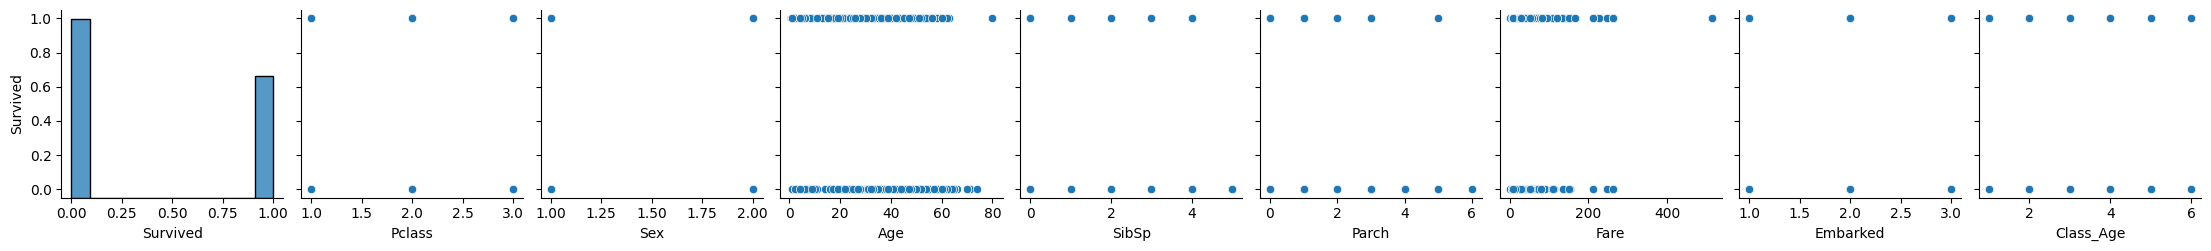

In [103]:
sns.pairplot(treino,y_vars='Survived')
#plt.scatter(data=treino,y='Survived',x='Class_Age')

<Axes: xlabel='Fare', ylabel='Count'>

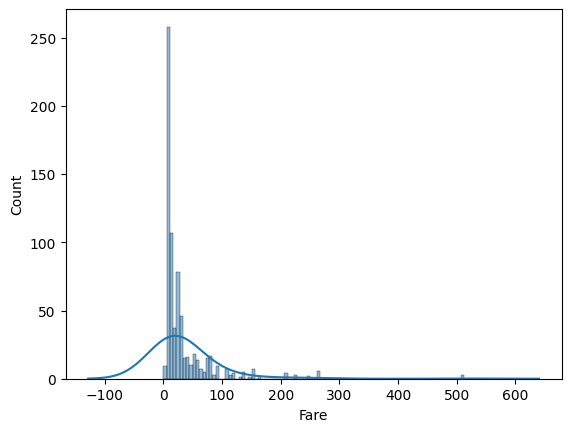

In [100]:
sns.histplot(treino.Fare,kde=True,kde_kws={'cut':3,'bw_adjust':3})

## Estimando modelo com stats model

In [105]:
y_train = treino.Survived
X_train = treino[['Pclass','Sex','Age','SibSp','Age','Embarked']]

In [107]:
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train,X_train_com_constante,hasconst=True).fit()
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     93.46
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.69e-75
Time:                        17:59:02   Log-Likelihood:                -322.69
No. Observations:                 712   AIC:                             657.4
Df Residuals:                     706   BIC:                             684.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3914      0.092      4.237      0.000       0.210       0.573
Pclass        -0.2033      0.019    -10.760      0.000      -0.240      -0.166
Sex            0.4831      0.031     15.720      0.000       0.423       0.543
Age           -0.0033      0.001     -5.841      0.000      -0.004      -0.002
SibSp         -0.0544      0.016     -3.348      0.001      -0.086      -0.023
Age           -0.0033      0.001     -5.841      0.000      -0.004      -0.002
Embarked       0.0261      0.028      0.941      0.347      -0.028       0.081
==============================================================================
Omnibus:                       25.483   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.532
Skew:                           0.481   Prob(JB):                     1.05e-06
Kurtosis:                       3.034   Cond. No.                     1.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.36e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()